In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in d:\programdata\anaconda3\lib\site-packages (from xgboost) (1.7.3)



In [2]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

[[9.00000000e+00 3.67897757e-02 0.00000000e+00 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [9.00000000e+00 2.97655332e-02 0.00000000e+00 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [9.00000000e+00 3.35514720e-02 0.00000000e+00 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 ...
 [6.60000000e+01 3.58588761e-02 0.00000000e+00 ... 1.15335526e-06
  5.50000000e-01 9.23076923e-01]
 [5.00000000e+01 5.04952871e-02 0.00000000e+00 ... 1.13561133e-05
  3.80000000e-01 9.23076923e-01]
 [7.20000000e+01 2.94530284e-02 0.00000000e+00 ... 3.11715172e-03
  6.70000000e-01 9.23076923e-01]]
[[3.67897757e-02 0.00000000e+00 5.71573604e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [2.97655332e-02 0.00000000e+00 6.70050761e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [3.35514720e-02 0.00000000e+00 8.09137056e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 ...
 [3.58588761e-02 0.00000000e+00 5.70558376e-01 ... 1.15335526e-06
  5.50000000e-01 9.23076923e-01]

C:\Users\17755\AppData\Local\Temp\ipykernel_18776\1986200779.py:53: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig2.legend([1, 2], labels = ["Difference Between test_y and preds", "---"], loc = "upper right")


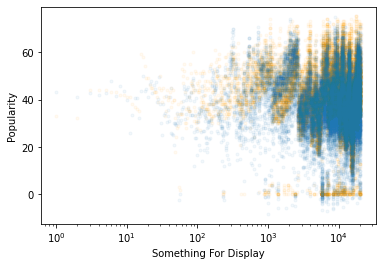

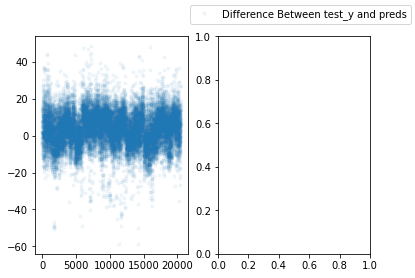

In [48]:
# dset = pd.read_csv('tracks.csv', index_col = 0) 
# print(dset)

# load data
dataset = np.loadtxt('tracks.csv', delimiter=",", skiprows=1) #Read only the numbers
print(dataset)

# split data into X and y
X = dataset[:, 1:dataset.shape[1]+1]
y = dataset[:, 0]
print(X, y)
print(X.shape, y.shape)

# split training and testing data (test : train = 20% : 80%)
train_data_number = int(dataset.shape[0] * 0.8)
test_data_number = dataset.shape[0] - train_data_number
print('train data num:', train_data_number, '\ntest data num:', test_data_number)
train_X, test_X = X[:train_data_number], X[train_data_number:]
train_y, test_y = y[:train_data_number], y[train_data_number:]
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

# set parameters
param = {'gamma': 0, 'seed': 0}

param['booster'] = 'gbtree' #default 
param['eta'] = 0.3 #default
param['objective'] = 'reg:squarederror' #default 
param['eval_metric'] = 'rmse' #if default, according to objective #This one is for training

print(param)

# train
model = xgb.XGBRegressor(**param) 
model.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
preds = model.predict(test_X)

#This one is extra, for the result
rmse = mean_squared_error(test_y, preds, squared = False)
print(rmse)

arr = np.arange(test_y.size)
plt.figure()
plt.semilogx(arr, test_y,'.', label='test', alpha = 0.05, color = 'orange')
plt.semilogx(arr, preds,'.', label='preds', alpha = 0.05)
plt.ylabel('Popularity')
plt.xlabel('Something For Display')
#orange one is test_y data, blue one is prediction

fig2, axis = plt.subplots(nrows = 1, ncols = 2)

difference = test_y - preds
axis[0].plot(arr, difference, '.', alpha = 0.05)
fig2.legend([1, 2], labels = ["Difference Between test_y and preds", "---"], loc = "upper right")

# plt.semilogx(arr, difference,'.', label='preds', alpha = 0.05)
# fit model on training data
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(train_X, train_y)
# train_y_hat = model.predict(train_X)
# print('>> train error:',
#       np.linalg.norm(train_y_hat - train_y, ord=1) / train_data_number)

# # test model
# test_y_hat = model.predict(test_X)
# print('>> test error:',
#       np.linalg.norm(test_y_hat - test_y, ord=1) / test_data_number)

# # plot feature importance
# from xgboost import plot_importance
# plot_importance(model)
# from matplotlib import pyplot
# pyplot.show()


In [47]:
#List the effects of different parameters
#max_depth
maxDepthArr = np.arange(8) + 1
loss_depth = np.empty(maxDepthArr.size)
for i in maxDepthArr:
    param_depth = {'gamma': 0, 'seed': 0}
    param_depth['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_depth['max_depth'] = i 
    
    model_depth = xgb.XGBRegressor(**param_depth) 
    model_depth.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_depth = model_depth.predict(test_X)

    #This one is extra, for the result
    rmse_depth = mean_squared_error(test_y, preds_depth, squared = False)
    loss_depth[i-1] = rmse_depth


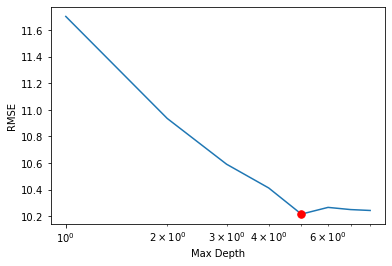

In [46]:
#Plot max_depth plot
plt.figure()
plt.semilogx(maxDepthArr, loss_depth)
plt.ylabel('RMSE')
plt.xlabel('Max Depth')
plt.plot(5, loss_depth[4], '.', color = 'red', markersize = 15)

In [66]:
#List the effects of different parameters
#learning_rate
learningRateArr = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss_learning_rate = np.empty(learningRateArr.size)
count_learning_rate = 0
for i in learningRateArr:
    param_learning_rate = {'gamma': 0, 'seed': 0}
    param_learning_rate['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_learning_rate['eta'] = i 
    
    model_learning_rate = xgb.XGBRegressor(**param_learning_rate) 
    model_learning_rate.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_learning_rate = model_learning_rate.predict(test_X)

    #This one is extra, for the result
    rmse_learning_rate = mean_squared_error(test_y, preds_learning_rate, squared = False)
    loss_learning_rate[count_learning_rate] = rmse_learning_rate
    count_learning_rate += 1
    print(count_learning_rate)


1
2
3
4
5
6
7
8
9
10
11


(10.0, 12.5)

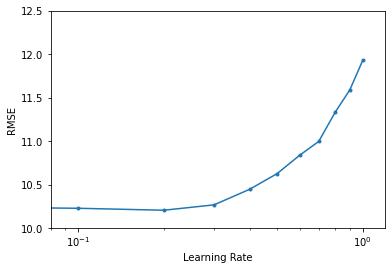

In [80]:
#Plot learning_rate plot
plt.figure()
plt.semilogx(learningRateArr, loss_learning_rate, '.-')
plt.ylabel('RMSE')
plt.xlabel('Learning Rate')
plt.xlim(0.08, 1.2)
plt.ylim(10, 12.5)

In [70]:
#List the effects of different parameters
#tree_method
treeArr = np.array(['auto','exact', 'approx', 'hist', 'gpu_hist'])
loss_tree = np.empty(treeArr.size)
for i in range(0, treeArr.size):
    param_tree = {'gamma': 0, 'seed': 0}
    param_tree['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_tree['tree_method'] = treeArr[i] 
    
    model_tree = xgb.XGBRegressor(**param_tree) 
    model_tree.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_tree = model_tree.predict(test_X)

    #This one is extra, for the result
    rmse_tree = mean_squared_error(test_y, preds_tree, squared = False)
    loss_tree[i] = rmse_tree
    print[i]


0
1
2
3
4


Text(0.5, 0, 'Tree Method')

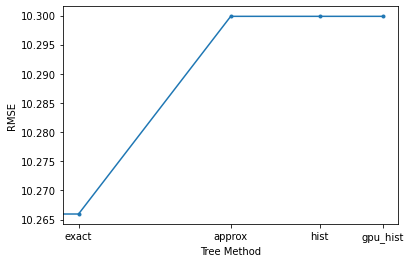

In [82]:
#Plot tree_method plot
plt.figure()
plt.semilogx(treeArr, loss_tree, '.-')
plt.ylabel('RMSE')
plt.xlabel('Tree Method')

In [88]:
#List the effects of different parameters
#eval_metric
evalArr = np.array(['rmse', 'rmsle', 'mae', 'mape', 'logloss', 'map', 'poisson-nloglik', 'gamma-nloglik'])
loss_eval = np.empty(evalArr.size)
for i in range(0, evalArr.size):
    param_eval = {'gamma': 0, 'seed': 0}
    param_eval['eval_metric'] = evalArr[i] #This one is for training
    
    model_eval = xgb.XGBRegressor(**param_eval) 
    model_eval.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_eval = model_eval.predict(test_X)

    #This one is extra, for the result
    rmse_eval = mean_squared_error(test_y, preds_eval, squared = False)
    loss_eval[i] = rmse_eval
    print(i)


0
1
2
3
4
5
6
7


Text(0.5, 0, 'Eval Metric')

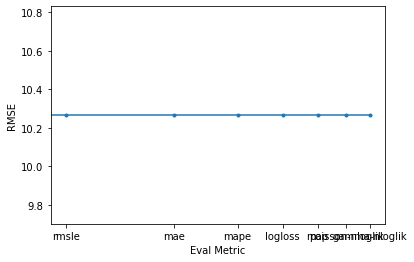

In [89]:
#Plot eval_metric plot
plt.figure()
plt.semilogx(evalArr, loss_eval, '.-')
plt.ylabel('RMSE')
plt.xlabel('Eval Metric')

In [95]:
#List the effects of different parameters
#booster
boosterArr = np.array(['gbtree', 'dart', 'gblinear'])
loss_booster = np.empty(boosterArr.size)
for i in range(0, boosterArr.size):
    param_booster = {'gamma': 0, 'seed': 0}
    param_booster['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_booster['booster'] = boosterArr[i] 

    model_booster = xgb.XGBRegressor(**param_booster) 
    model_booster.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_booster = model_booster.predict(test_X)

    #This one is extra, for the result
    rmse_booster = mean_squared_error(test_y, preds_booster, squared = False)
    loss_booster[i] = rmse_booster
    print(i)


0
1
[20:15:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma" } are not used.

2


[1.02659483e+01 1.02659484e+01 5.86651554e+30]


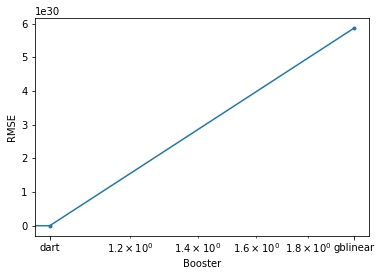

In [108]:
#Plot booster plot
plt.figure()
plt.semilogx(boosterArr, loss_booster, '.-')
plt.ylabel('RMSE')
plt.xlabel('Booster')
print(loss_booster)